### Thompson Sampling
<small>

Thompson Sampling is a method used to make smart decisions when you’re unsure which option is best. 

It works by:
1. Randomly picking options based on how good it thinks each one is.
2. Updating its beliefs after each try, based on the results (good or bad).
3. Balancing exploration and exploitation by sometimes choosing the best-known option and sometimes exploring others.

It’s useful in situations like online advertising, A/B testing, or clinical trials, where you want to find the best choice without missing hidden opportunities. It’s like an explorer who keeps trying new things while learning from experience!

<br>

<b>UCB vs Thompson Sampling: </b>

1. Decision type 

    - UCB: Deterministic (calculated choice)
    - Thompson: Random (probability-based choice)
        - probability:  giving each option a chance

2. Exploration
    - UCB: Controlled, based on confidence
    - Thompson: Random, based on sampling guesses 
    
    <br>

    - UCB: Explores at first, then focuses on the best option and stops exploring other choices
    - Thompson: Randomly explores, even after finding a good option, but doesn’t explore endlessly
    

3. Exploitation
    - UCB: Picks the best-known option often
    - Thompson: Picks the best option probabilistically

4. Risk Level
    - UCB: Low risk, safer choices
    - Thompson: Higher risk, more exploration

5. Speed
    - UCB: Converges quickly to best option
    - Thompson: Slower due to more exploration

6. Use case
    - UCB: Fast, stable, decision-making
    - Thompson: Unvertain, high-reward environments

<br>
Generally, Thompson Sampling is considered better than UCB (Upper Confidence Bound) when dealing with small datasets because it leverages Bayesian statistics to incorporate prior information and naturally balances exploration and exploitation, making it more efficient in situations with limited data points compared to UCB's confidence interval-based approach
</small>

Importing the libraries

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

Importing the dataset

In [22]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

Implementing Thompson Sampling

In [23]:
# UCB algorithm
import random

N = 10000
d = 10

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d

total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i 
    
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    
    total_reward += reward 
    

Visualizing the results

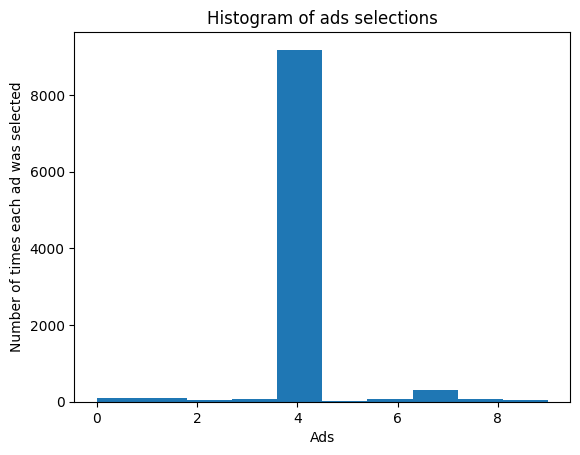

In [24]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()